<a href="https://colab.research.google.com/github/guimasuko/project/blob/main/Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
%pip install yfinance --upgrade --no-cache-dir
%pip install investpy


Note: you may need to restart the kernel to use updated packages.


In [72]:
import yfinance as yf
import investpy as inv

In [73]:
import time
import datetime

### Taxa de juros Brasil (Selic)

Códigos para obtenção de dados do bc:

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

In [74]:
# função que retorna dados do banco central através de códigos
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [75]:
# código da meta da taxa de juros brasileira (selic)
selic = consulta_bc(432)

In [76]:
selic.rename(columns={'valor': 'Selic'}, inplace=True)
selic.head()

,Selic
data,
1999-03-05,45.0
1999-03-06,45.0
1999-03-07,45.0
1999-03-08,45.0
1999-03-09,45.0


In [77]:
selic.to_csv('data/selic.csv')

### Dólar e Ibovespa

In [78]:
tickers = "^BVSP USDBRL=X"
dollar_ibov = yf.download(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [79]:
dollar_ibov.rename(columns={'USDBRL=X': 'Dollar', '^BVSP': 'Ibovespa'}, inplace=True)

In [80]:
dollar_ibov.head()

,Dollar,Ibovespa
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0


In [81]:
dollar_ibov.to_csv('data/dollar_ibov.csv')

### Unindo os dois dataframes.

In [82]:
df = pd.merge(dollar_ibov, selic, left_index=True, right_index=True)
df

,Dollar,Ibovespa,Selic
2007-01-01,2.132500,NaN,13.25
2007-01-02,2.131000,45383.000000,13.25
2007-01-03,2.134500,44445.000000,13.25
2007-01-04,2.139000,44020.000000,13.25
2007-01-05,2.147000,42245.000000,13.25
...,...,...,...
2022-02-11,5.248700,113495.000000,10.75
2022-02-14,5.249956,113807.000000,10.75
2022-02-15,5.214000,114660.000000,10.75
2022-02-16,5.157900,115406.000000,10.75


In [83]:
df.to_csv('data/dollar_ibov_selic.csv')

### Tarefa 02

In [84]:
import seaborn as sns

<AxesSubplot:title={'center':'Série da Taxa Selic 2007-2022'}, ylabel='Porcentagem'>

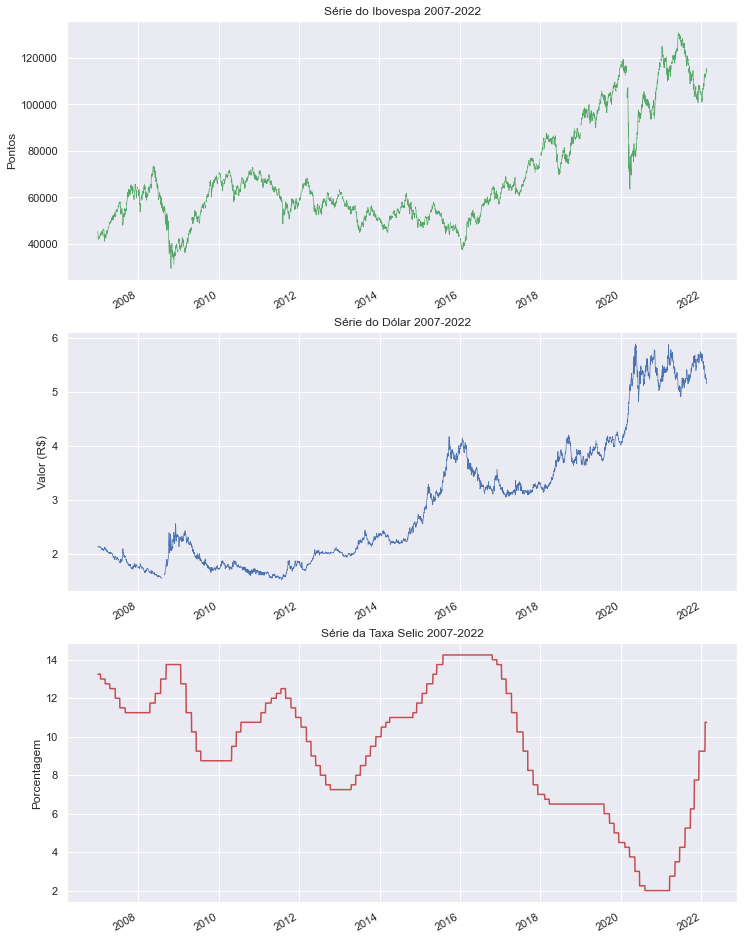

In [85]:
sns.set()
fig, axes = plt.subplots(3,1,figsize=(12,18))

df['Ibovespa'].plot(ax=axes[0], ylabel='Pontos', title='Série do Ibovespa 2007-2022', linewidth=.7, color='g')
df['Dollar'].plot(ax=axes[1], ylabel='Valor (R$)', title='Série do Dólar 2007-2022', linewidth=.7, color='b')
df['Selic'].plot(ax=axes[2], ylabel='Porcentagem', title='Série da Taxa Selic 2007-2022', color='r')

In [86]:
df['Dollar'].mean(skipna=True)

2.949563690041826

In [87]:
df1 = df.groupby(df.index.year).mean()
df1['Dollar'] = round(df1['Dollar'], 2)
df1['Ibovespa'] = round(df1['Ibovespa'],0).astype(int)
df1['Selic'] = round(df1['Selic'], 2)
df1

,Dollar,Ibovespa,Selic
2007,1.95,53114,12.05
2008,1.84,55261,12.45
2009,1.99,52751,10.15
2010,1.75,67258,9.91
2011,1.67,61207,11.76
2012,1.95,59579,8.63
2013,2.15,53670,8.29
2014,2.35,52730,10.96
2015,3.33,49780,13.47
2016,3.48,53258,14.18


<AxesSubplot:title={'center':'Média da Taxa Selic por ano 2007-2022'}, xlabel='Data', ylabel='Porcentagem'>

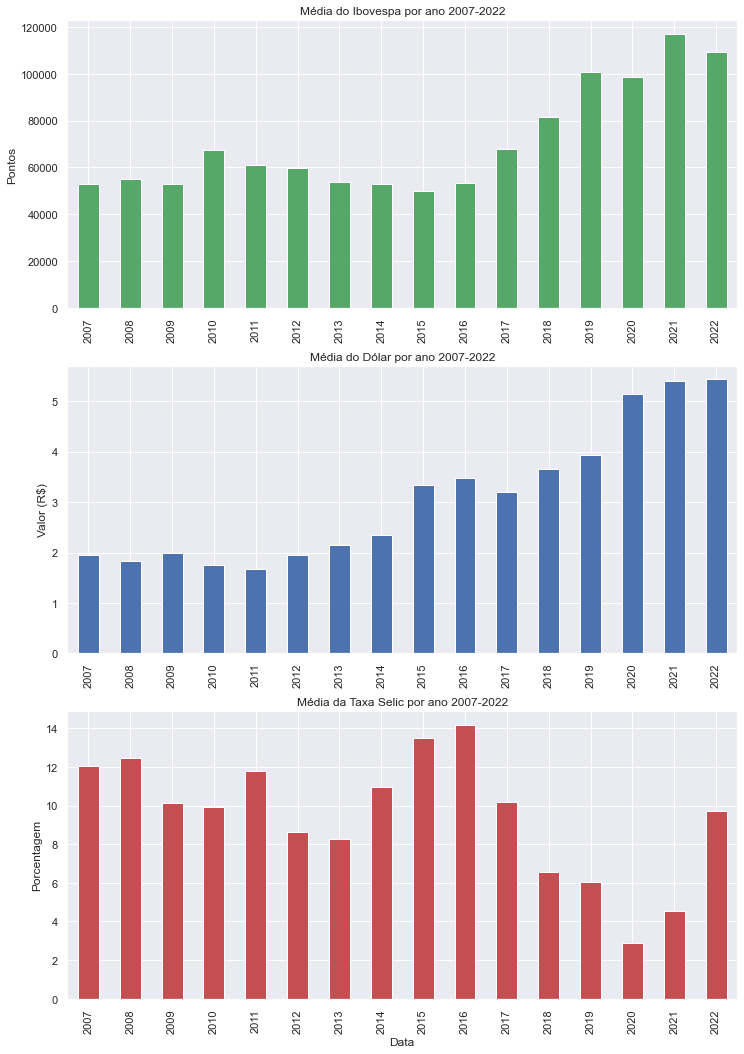

In [88]:
sns.set()
fig, axes = plt.subplots(3,1,figsize=(12,18))

df1['Ibovespa'].plot(ax=axes[0], kind='bar', ylabel="Pontos", title="Média do Ibovespa por ano 2007-2022", color='g')
df1['Dollar'].plot(ax=axes[1], kind='bar', ylabel="Valor (R$)", title="Média do Dólar por ano 2007-2022", color='b')
df1['Selic'].plot(ax=axes[2], kind='bar', xlabel="Data", ylabel="Porcentagem", title="Média da Taxa Selic por ano 2007-2022", color='r')

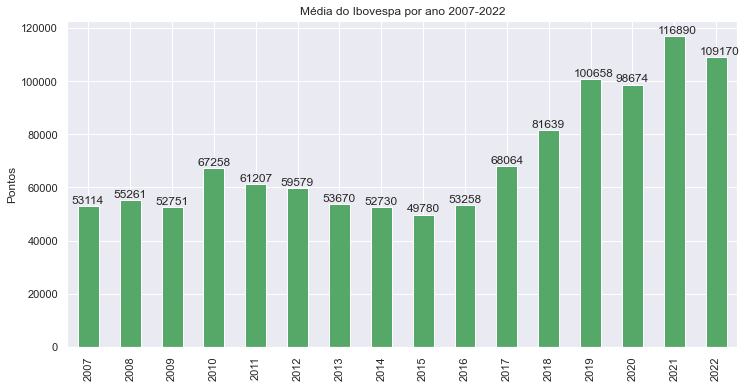

In [89]:
df1['Ibovespa'].plot(kind='bar', ylabel="Pontos", title="Média do Ibovespa por ano 2007-2022", color='g', figsize=(12,6))

y = df1['Ibovespa'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.4, value + 1000, str(value))

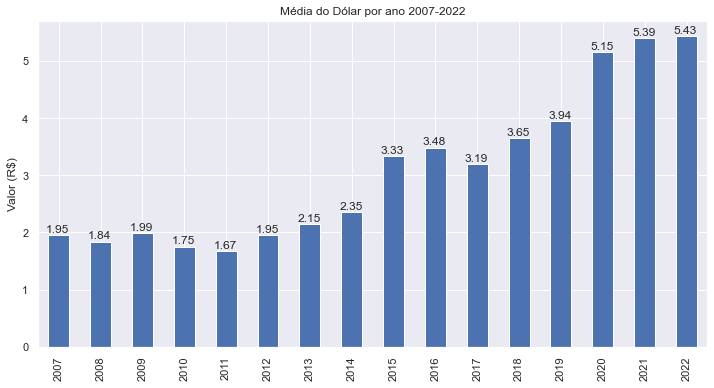

In [90]:
df1['Dollar'].plot(kind='bar', ylabel="Valor (R$)", title="Média do Dólar por ano 2007-2022", color='b', figsize=(12,6))

y = df1['Dollar'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.3, value + 0.05, str(value))

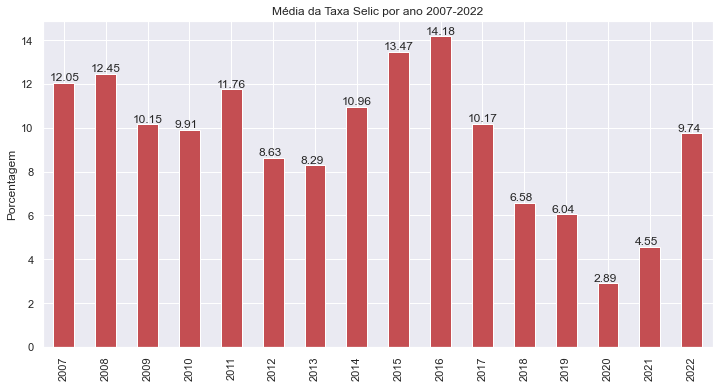

In [91]:
df1['Selic'].plot(kind='bar', ylabel="Porcentagem", title="Média da Taxa Selic por ano 2007-2022", color='r', figsize=(12,6))

y = df1['Selic'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.35, value + 0.1, str(value))